Jovi Fez Bartolata 
<br>C0869701

<br>Assignment 5: Artificial Neural Network (ANN) vs Linear Regression for California Housing Data
<br>2023F-T3 AML 3104 - Neural Networks and Deep Learning

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
import keras as ks
from tensorflow.keras import layers
import math
from sklearn.datasets import fetch_california_housing

### Data Preprocessing
- Explore and understand the features of the dataset.
- Handle any missing values or outliers if present.
- Split the dataset into training and testing sets.

In [3]:
# Load California Housing dataset
cali_housing = fetch_california_housing()

print(cali_housing.DESCR)
print('\nKeys:',cali_housing.keys())

# print('\nData:',cali_housing.data)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Create dataframe for features
df = pd.DataFrame(cali_housing.data, columns=cali_housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# Add target to the dataframe
df['HousePrice'] = cali_housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
# Show column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HousePrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<b>Observation</b>: There is no categorical feature in the data.

In [7]:
# Describe data, show statistics 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
# Check null values
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

<b>Observation</b>: No null values in the data.

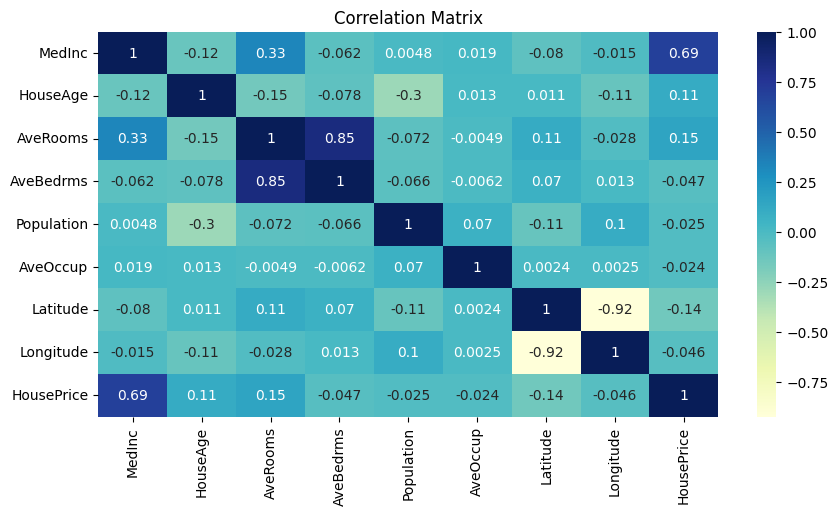

In [9]:
# Correlation Heat Map: Pair-wise correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

<b>Observation</b>: AveRooms and AveBedrms are highly correlated, we can keep one feature only. We will keep AveRooms because it has higher correlation with HousePrice.

In [10]:
# Get target and features
drop_feature = ['HousePrice','AveBedrms']

x_vars = df.drop(drop_feature, axis=1)
y_var = df['HousePrice']

print('x data:',x_vars.shape)
print('y data:',y_var.shape)

x data: (20640, 7)
y data: (20640,)


In [11]:
# Split the data into training (80%) and test (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x_vars,y_var,test_size=0.2,random_state=1234)

print('X Train:',x_train.shape)
print('Y Train:',y_train.shape)
print('X Test:',x_test.shape)
print('Y Test:',y_test.shape)

X Train: (16512, 7)
Y Train: (16512,)
X Test: (4128, 7)
Y Test: (4128,)


In [12]:
# Function to check for outliers and cap values of outliers
def CheckOutliers(inTrain,inTest):
    
    # Initialize blank dataframes
    outTrain = pd.DataFrame()
    outTest = pd.DataFrame()
    
    # Loop through all features
    for colName in inTrain.columns:
        
        # Compute for lower/upper limits using the training data
        quartile_75, quartile_q25 = np.percentile(inTrain.loc[:,colName],[75,25])   # 75th and 25th percentiles
        interquartile_range = quartile_75 - quartile_q25                            # Interquartile range (IQR)
        max_val = quartile_75 + ( 1.5 * interquartile_range )                       # Upper limit
        min_val = quartile_q25 - ( 1.5 * interquartile_range )                      # Lower limit
        
        # If the value is lower/greater than the min/max limits, it is an outlier
        outliers = inTrain[(inTrain[colName] < min_val) | (inTrain[colName] > max_val)]
        
        # For outliers, apply capping -- replace the value with either the lower or upper limit
        outTrain[colName] = np.where( inTrain[colName] > max_val, max_val, np.where( inTrain[colName] < min_val, min_val, inTrain[colName] ) )

        # Apply capping to the test set using the same lower/upper limit in the train set
        outTest[colName] = np.where( inTest[colName] > max_val, max_val, np.where( inTest[colName] < min_val, min_val, inTest[colName] ) )
        
        # Summary per feature
        print(f'Train -- No. of outliers for {colName}: {outliers.shape[0]} \tLimits: {round(min_val,4)} , {round(max_val,4)}')
    
    return outTrain, outTest

# df_x_train_sc = pd.DataFrame(x_train_sc,columns=x_train.columns)

# Check and handle outliers of the data. For the test set, the lower/upper limits will be the same as the training set.
x_train_no_outliers, x_test_no_outliers = CheckOutliers(x_train,x_test)
# x_train_no_outliers.head()

Train -- No. of outliers for MedInc: 539 	Limits: -0.7188 , 8.0312
Train -- No. of outliers for HouseAge: 0 	Limits: -10.5 , 65.5
Train -- No. of outliers for AveRooms: 413 	Limits: 2.0092 , 8.4869
Train -- No. of outliers for Population: 942 	Limits: -606.5 , 3119.5
Train -- No. of outliers for AveOccup: 574 	Limits: 1.1561 , 4.558
Train -- No. of outliers for Latitude: 0 	Limits: 28.26 , 43.38
Train -- No. of outliers for Longitude: 0 	Limits: -127.5 , -112.3


<b>Observation</b>: There are outliers in the data. It's highest in Population where 6% (942 out of 16,512) are outliers. Instead of dropping at least 6% of the records, capping of values was applied.

In [13]:
# Scale the data
# scaler = MinMaxScaler()
scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train_no_outliers)
x_test_sc = scaler.transform(x_test_no_outliers)
# pd.DataFrame(x_train_sc,columns=x_train.columns)

C:\Users\barto\AppData\Local\Temp\ipykernel_48800\2318038710.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X Train After Scaling and Handling Outliers')

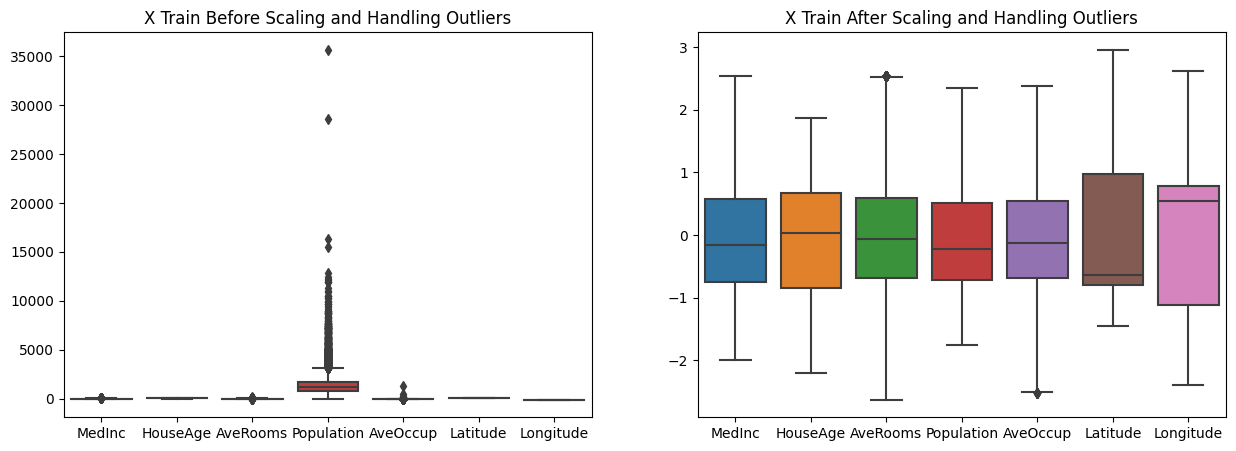

In [14]:
# Display the boxplot to compare before/after scaling
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('X Train Before Scaling and Handling Outliers')

plt.subplot(1,2,2)
sns.boxplot(data=pd.DataFrame(x_train_sc,columns=x_train.columns))
# sns.boxplot(data=x_train_sc)
plt.title('X Train After Scaling and Handling Outliers')

<b>Observation</b>: After feature scaling, the values are now in the same range, therefore, features are comparable.

### Linear Regression
- Implement a Linear Regression model using scikit-learn.
- Train the model on the training set.
- Make predictions on the testing set.
- Evaluate the model's performance using appropriate regression metrics (e.g., Mean Squared Error, R2 Score).

In [15]:
# Function evaluate the model
def ModelEval(inAlgo=None,inActual=None,inPred=None,inFeature=None):
    
    # Cost Function
    print(f'{inAlgo} - Cost Function')
    print(f'MAE: {mean_absolute_error(inActual,inPred)}')
    print(f'MSE: {mean_squared_error(inActual,inPred)}')

    # Performance of the Model
    print(f'\n{inAlgo} - Performance')
    print(f'R2: {r2_score(inActual,inPred)}')
    print(f'Adjusted R2 {1 - (1-r2_score(inActual,inPred))*(len(inActual)-1)/(len(inActual)-inFeature.shape[1]-1)}')        

In [16]:
# Model Training Using Linear Regression

linear_reg = LinearRegression()

# Train the model using training data
model_lr = linear_reg.fit(x_train_sc, y_train)
print('Coeff:',model_lr.coef_)
print('Intercept:',model_lr.intercept_)
print()

# Predict the values of y
y_pred_lr = model_lr.predict(x_test_sc)

# Model Eval
ModelEval('Linear Regression',y_test,y_pred_lr,x_train_sc)

Coeff: [ 0.73560905  0.15681357 -0.0338553   0.04682365 -0.29351686 -0.86854912
 -0.78221364]
Intercept: 2.0663313656734474

Linear Regression - Cost Function
MAE: 0.5156186031017312
MSE: 0.48007552131580583

Linear Regression - Performance
R2: 0.645127900321622
Adjusted R2 0.6445249622881879


In [21]:
# # Model Training Using Ridge Regression

# ridge_reg = Ridge()

# # Train the model using training data
# model_rd = ridge_reg.fit(x_train_sc, y_train)
# print('Coeff:',model_rd.coef_)
# print('Intercept:',model_rd.intercept_)
# print()


# # Predict the values of y
# y_pred_rd = model_rd.predict(x_test_sc)

# # Model Eval
# ModelEval('Ridge Regression',y_test,y_pred_rd,x_train_sc)


### Artificial Neural Network (ANN)
- Implement a simple ANN for regression using a framework like TensorFlow or Keras.
- Design the architecture of the neural network, including the input and output layers.
- Train the ANN on the training set.
- Make predictions on the testing set.
- Evaluate the model's performance using the same regression metrics used for Linear Regression.


In [22]:
# Split the data intro training and validation sets
x_train_ann, x_valid_ann, y_train_ann, y_valid_ann = train_test_split(x_train_sc,y_train,test_size=0.2,random_state=1234)

print('X Train - ANN:',x_train_ann.shape)
print('Y Train - ANN:',y_train_ann.shape)
print('X Valid - ANN:',x_valid_ann.shape)
print('Y Valid - ANN:',y_valid_ann.shape)

X Train - ANN: (13209, 7)
Y Train - ANN: (13209,)
X Valid - ANN: (3303, 7)
Y Valid - ANN: (3303,)


In [26]:
# Set up the layers of ANN
ann_layers = [tf.keras.layers.Dense(units=50, input_shape=x_train_ann.shape[1:], activation='relu'),
              tf.keras.layers.Dense(units=30, activation="relu", kernel_initializer='uniform', name="hiddenLayer1"),
              tf.keras.layers.Dense(units=10, activation="relu", kernel_initializer='uniform', name="hiddenLayer2"),
            #   tf.keras.layers.Dense(units=10, activation="relu", kernel_initializer='uniform', name="hiddenLayer3"),
              tf.keras.layers.Dense(units=1, activation="linear", kernel_initializer='uniform', name="outputLayer")]

model_ann = tf.keras.models.Sequential(ann_layers)

print('Layers:\n')
print(model_ann.layers)
print('\n\nSummary:\n')
print(model_ann.summary())

Layers:

[<keras.src.layers.core.dense.Dense object at 0x0000019C5F7DF400>, <keras.src.layers.core.dense.Dense object at 0x0000019C5F7DE860>, <keras.src.layers.core.dense.Dense object at 0x0000019C5F7DD720>, <keras.src.layers.core.dense.Dense object at 0x0000019C5F7DF580>]


Summary:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                400       
                                                                 
 hiddenLayer1 (Dense)        (None, 30)                1530      
                                                                 
 hiddenLayer2 (Dense)        (None, 10)                310       
                                                                 
 outputLayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 2251 (8.79 KB)
Tra

Epoch 1/10
413/413 [==============================] - 1s 2ms/step - loss: 1.1477 - mae: 0.7257 - val_loss: 0.4036 - val_mae: 0.4700
Epoch 2/10
413/413 [==============================] - 1s 1ms/step - loss: 0.4066 - mae: 0.4570 - val_loss: 0.3564 - val_mae: 0.4308
Epoch 3/10
413/413 [==============================] - 1s 1ms/step - loss: 0.3809 - mae: 0.4401 - val_loss: 0.3314 - val_mae: 0.4164
Epoch 4/10
413/413 [==============================] - 1s 1ms/step - loss: 0.3699 - mae: 0.4319 - val_loss: 0.3276 - val_mae: 0.4140
Epoch 5/10
413/413 [==============================] - 1s 1ms/step - loss: 0.3675 - mae: 0.4307 - val_loss: 0.3278 - val_mae: 0.4182
Epoch 6/10
413/413 [==============================] - 1s 1ms/step - loss: 0.3614 - mae: 0.4251 - val_loss: 0.3282 - val_mae: 0.4199
Epoch 7/10
413/413 [==============================] - 1s 1ms/step - loss: 0.3587 - mae: 0.4233 - val_loss: 0.3185 - val_mae: 0.4039
Epoch 8/10
413/413 [==============================] - 1s 1ms/step - loss: 0.

<AxesSubplot: >

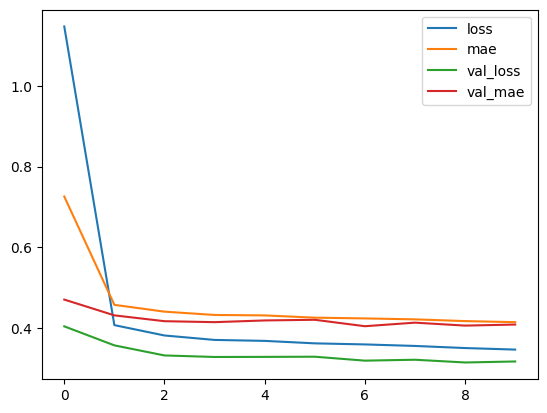

In [27]:
# Compile the ANN model
model_ann.compile(loss='mse',
                  optimizer="adam",
                  metrics=['mae']
                  )

# Model Training Using ANN
history = model_ann.fit(x_train_ann, y_train_ann, epochs=10,
                        validation_data=(x_valid_ann, y_valid_ann),
                        batch_size=32)

# Plot
pd.DataFrame(history.history).plot()

In [28]:
# Predict the values of y
y_pred_ann = model_ann.predict(x_test_sc, verbose=0)

# Model Eval
ModelEval('ANN',y_test,y_pred_ann,x_train_sc)

ANN - Cost Function
MAE: 0.4221364674612395
MSE: 0.3562724901885588

ANN - Performance
R2: 0.7366431716736324
Adjusted R2 0.7361957207517187


### Comparison and Analysis

Compare the performance metrics of the Linear Regression and ANN models.
- In terms of performance, ANN is better compared to Linear Regression. It's R-squared is 74%, higher vs 64% for Linear Regression. It also has lower MSE of 0.3563 vs 0.4800 for Linear Regression.

Discuss the strengths and weaknesses of each model.
- Linear Regression is less complex and more interpretable compared to ANN. It also trains faster compared to ANN. However, Linear Regression assumes that the relationship between the target and the features is linear, whereas ANN can handle even non-linear relationships. In cases where the relationship of the target and feature is non-linear, Linear Regression does not perform well.

Analyze whether the complexity of an ANN provides better predictive performance compared to Linear Regression.
- In this simple ANN model, yes, it provides better predictive performance compared to Linear Regression. However, implementing overly complex ANN models may lead to overfitting especially if the data is small, so it's still a balance between generalization performance (not over/under fitted) and model complexity.

### Visualization

Create visualizations (e.g., scatter plots, line plots) to compare the predicted values of the two models with the actual values.
Visualize the model architectures if possible.



(-1.0, 7.0)

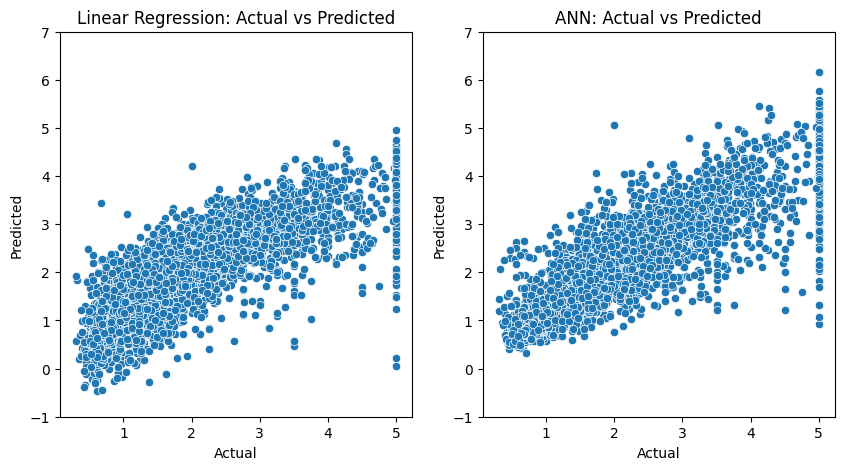

In [29]:
# Plot actual vs predicted

# Axis limits
y_axis_min = min(math.floor(min(y_test)), math.floor(min(y_pred_lr)), math.floor(min(y_pred_ann)))
y_axis_max = max(math.ceil(max(y_test)), math.ceil(max(y_pred_lr)), math.ceil(max(y_pred_ann))) 

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.title(f'Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.ylim(ymin=y_axis_min, ymax=y_axis_max)

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_ann.flatten())
plt.title(f'ANN: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.ylim(ymin=y_axis_min, ymax=y_axis_max)

<b>Observation:</b> The predicted values in ANN are closer to the actuals, particulary for lower values.

(-5.0, 4.0)

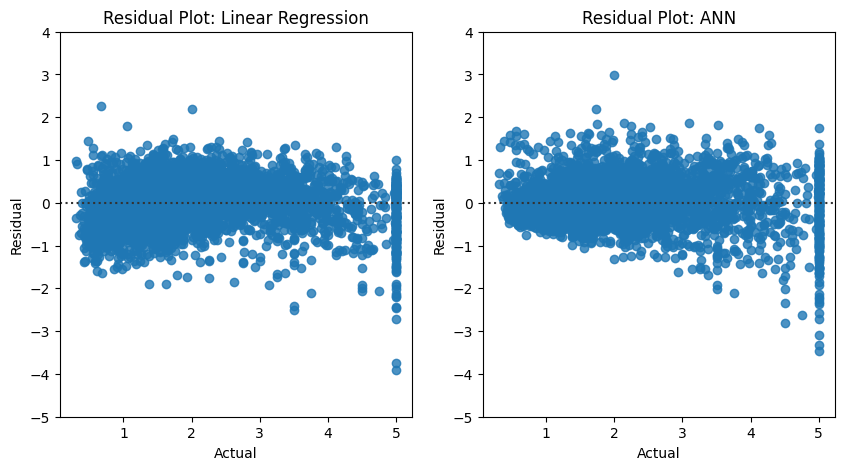

In [33]:
# Residual plots

# Axis limits
y_axis_min = -5
y_axis_max = 4

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.residplot(x=y_test, y=y_pred_lr)
plt.title(f'Residual Plot: Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.ylim(ymin=y_axis_min, ymax=y_axis_max)

plt.subplot(1,2,2)
sns.residplot(x=y_test, y=y_pred_ann.flatten())
plt.title(f'Residual Plot: ANN')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.ylim(ymin=y_axis_min, ymax=y_axis_max)

<b>Observation:</b> For lower values, Linear Regression has larger residuals compared to ANN. For ANN, residuals tend to increase as the actual values increase.

### Conclusion

In this exercise, the ANN model outperformed the Linear Regression model in predicting house prices in the California Housing dataset. 74% of the variability observed in the House Prices is explained by the ANN model.

Challenges:
- Outliers: There are outliers in the data that needed to be handled so as not to affect the model training.
- Training Time: It took a longer time to train the ANN model. 
- Hyperparameter Tuning: ANN has a lot of hyperparameters so finding the right combination of hyperparameters was a bit challenging. This and the longer traning time for each hyperparameter combination resulted to longer data modeling.
- Interpretability: Linear Regression is easier to interpret based on coefficients. For ANN, it's more challenging to interpret how the features affect the target variable.